In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
data=pd.read_csv("/content/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

The dataset has 33 attributes and 569 instances.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Out of 33 attributes,32 attributes are numerical. There is only one categorical column 'diagnosis'.

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There aren't any null values in any columns other than an unnamed column.
Let us drop that column as it consists only of null values.

In [ ]:
data=data.drop('Unnamed: 32',axis=1)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Diagnosis is the target variable which classifies the tumour as malignant or benign.
357 benign cases and 212 malignant cases are present.

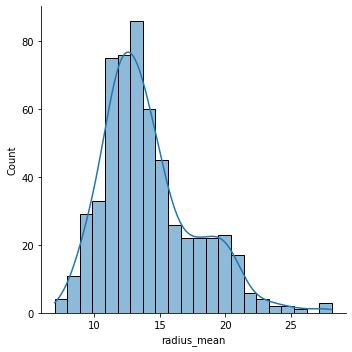

In [ ]:
sns.displot(data=data,x='radius_mean',kde=True)

The distrubution of the radius mean column seem to be slightly skewed to the right.(fig 1)



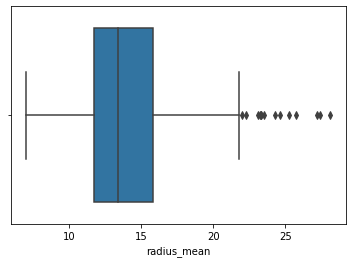

In [ ]:
sns.boxplot(data=data,x='radius_mean')

There are few outliers present in the column.The interquartile range is between 12 and 16 approximately.Outliers lie above the upperbound which is approximately 22.(fig 2)

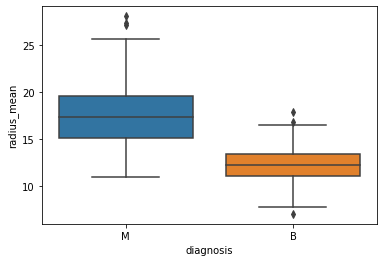

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='radius_mean')

The raduis mean range for malignant tumour is 10-25. There is also presence of outliers above the upper bound. 15-20 is the range of radius mean where majority of the malignant population lie.
In case of benign tumors' radius mean, majority of the population lies in the range of 10 and 15. (fig 3)

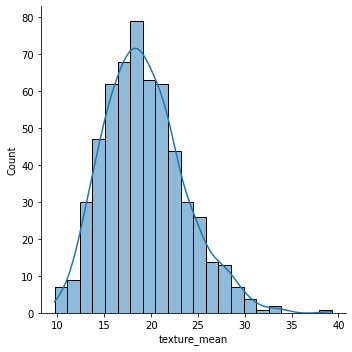

In [ ]:
a=sns.displot(data=data,x='texture_mean',kde=True)

The distribution of texture mean is also slighlty skewed to the right(fig 4)

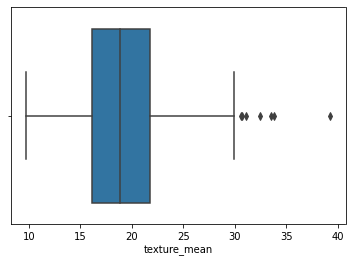

In [ ]:
sns.boxplot(data=data,x='texture_mean')

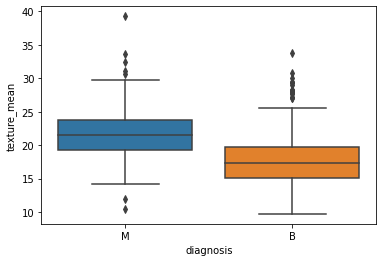

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='texture_mean')

The texture size of malignant tumours has outliers both above and below the upper and lower bounds respectively.Excluded the outliers, the range of texture mean for malignancy is 15-30.the iqr is between 20 and 25.
The texture mean range for benign tumours is 10-25. There is a good number of benign tumours whose texture mean is above the uppper bound .(fig 5 & 6)

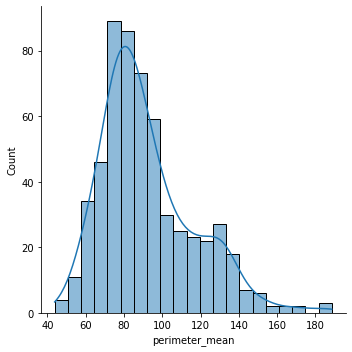

In [ ]:
sns.displot(data=data,x='perimeter_mean',kde=True)

The distribution of perimeter mean is slightly right skewed which shows that there can outliers above the upper bound.(fig 7)

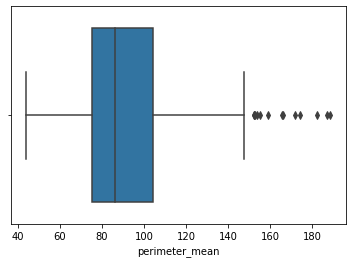

In [ ]:
sns.boxplot(data=data,x='perimeter_mean')

As we assumed, there are outlier present in the column'perimeter mean.The Interquartile range lies between around 70 and 110.Outlier are present the region above the upper bound only.(fig 8)

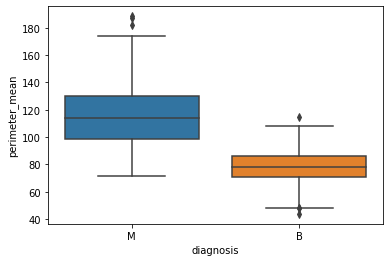

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='perimeter_mean')

The perimeter mean range for malignant tumours is from 70 to 180. The interquartile range lies between 100 and 140 where majority of the malignant tumours lie.
The interquartile range for benign tumours is 70-90. This column has a significant effect on the type of tumour.(fig 9)

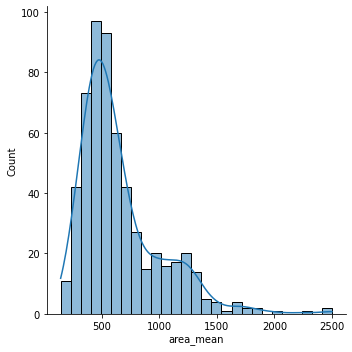

In [ ]:
sns.displot(data=data,x='area_mean',kde=True)

The area mean also has a distribution that is skewed to the right.(fig 10)

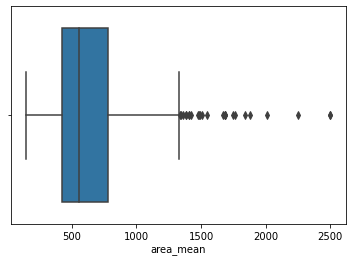

In [ ]:
sns.boxplot(data=data,x='area_mean')

The upper bound lies around 1400 and there could be seen a pretty good number of data points lying above the upper bound. (fig 11)

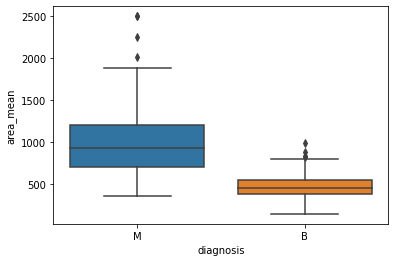

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='area_mean')

The interquartile range for area mean lies between 750 and 1250 for malignant tumours. There are also few outliers present above the upper bound.
The interquartile range for benign tumours 400-600.
This column also plays a significant role in classifying the tumour's malignancy.(fig 12)

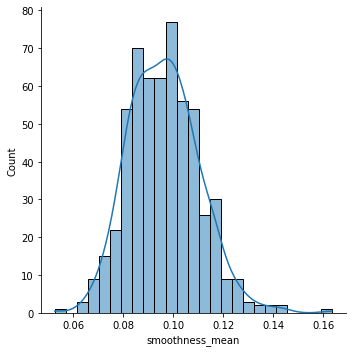

In [ ]:
sns.displot(data=data,x='smoothness_mean',kde=True)

In [ ]:
data['smoothness_mean'].describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

The smoothness mean column has a normal distribution.The description show that the mean and median are closer which is a sign of normal distribution.(fig 13)

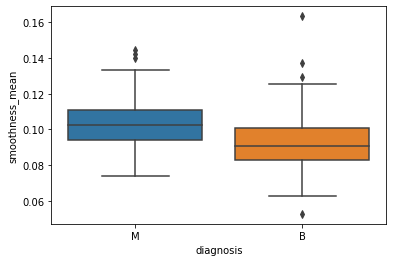

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='smoothness_mean')

The iqr for smoothness range in malignant case is 0.09 to 0.11.
The iqr for smoothness range in benign  case is 0.08 to 0.10.
There isn't very significant difference among the ranges for both the cases.(fig 14)

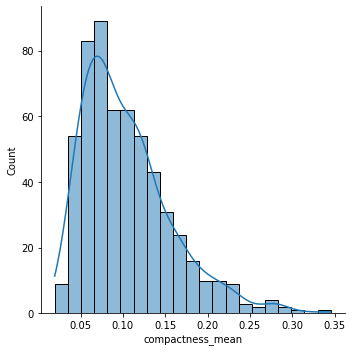

In [ ]:
sns.displot(data=data,x='compactness_mean',kde=True)

The compactness mean has right skewed distribution.(fig 15)

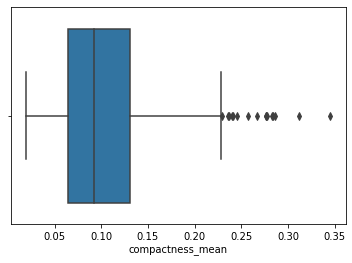

In [ ]:
sns.boxplot(data=data,x='compactness_mean')

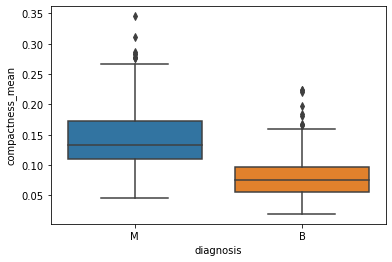

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='compactness_mean')

The interquartile ranges for malignancy and benign tumours are 0.10-0.17 and 0.05-0.10 respectively.(fig 16)

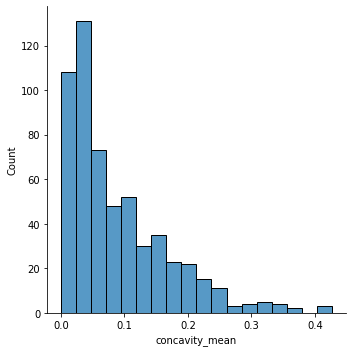

In [ ]:
sns.displot(data=data,x='concavity_mean')

The distribution of the variable concavity_mean is skewed to right which means the mean would be lesser than the median.(fig 17)

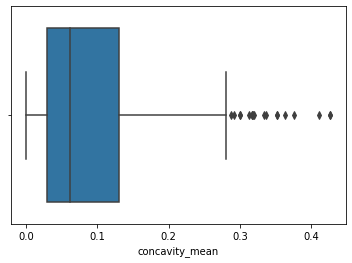

In [ ]:
sns.boxplot(data=data,x='concavity_mean')

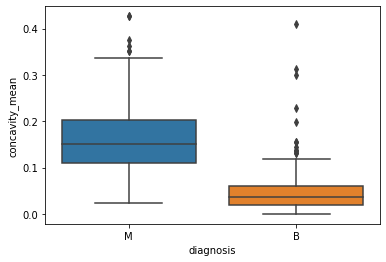

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='concavity_mean')

This column seems to have a significant effect on the target variable as there is a huge variation in the iqr of malignant and benign tumors.(fig 18)

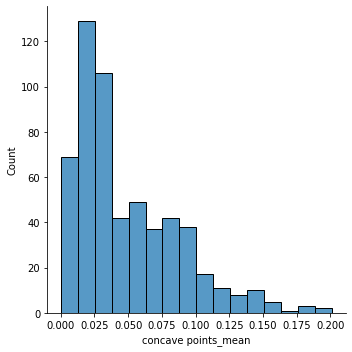

In [ ]:
sns.displot(data=data,x='concave points_mean')

We can observe a right skewed distribtionfor the feature concave points_mean.(fig 19)

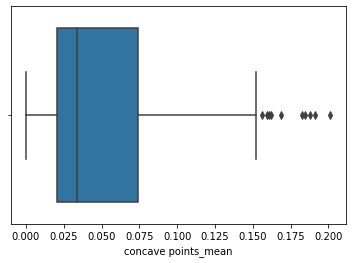

In [ ]:
sns.boxplot(data=data,x='concave points_mean')

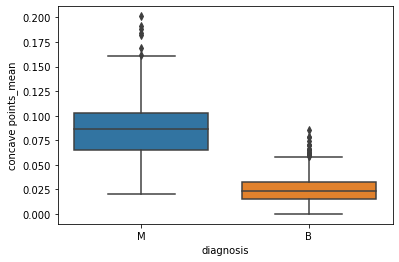

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='concave points_mean')

There is significant difference in the interquartile ranges of the two categories of tumour.(fig 20)

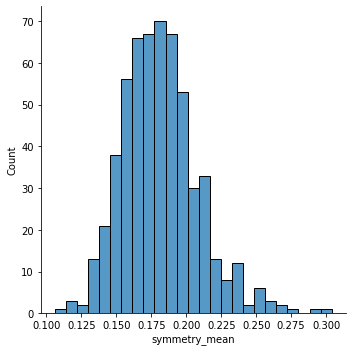

In [ ]:
sns.displot(data=data,x='symmetry_mean')

In [ ]:
data['symmetry_mean'].describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry_mean, dtype: float64

The symmetry mean has a normal distribution.(fig 20)

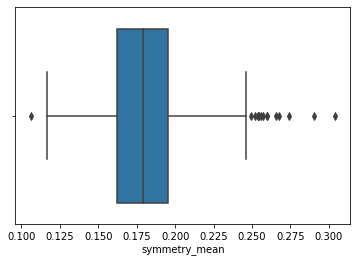

In [ ]:
sns.boxplot(data=data,x='symmetry_mean')

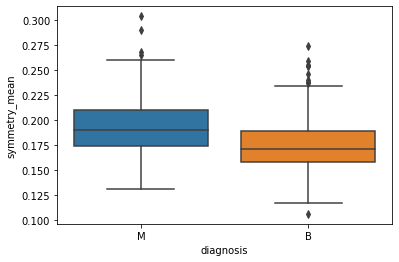

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='symmetry_mean')

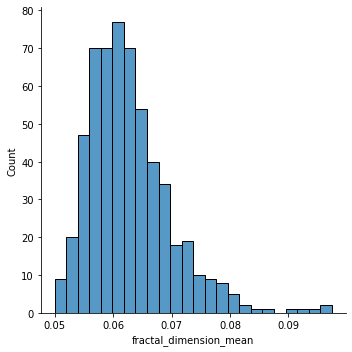

In [ ]:
sns.displot(data=data,x='fractal_dimension_mean')

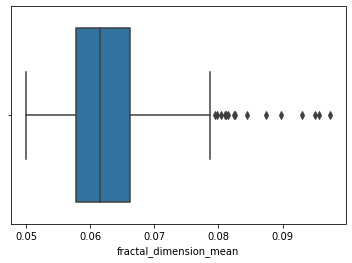

In [ ]:
sns.boxplot(data=data,x='fractal_dimension_mean')

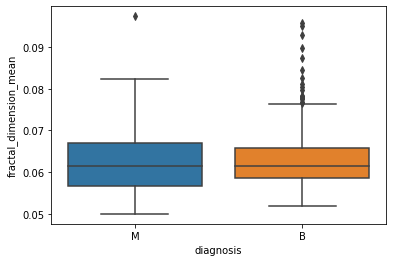

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='fractal_dimension_mean')

This column doesnt seem to have any significance on the target variable as there is no difference in their ranges.

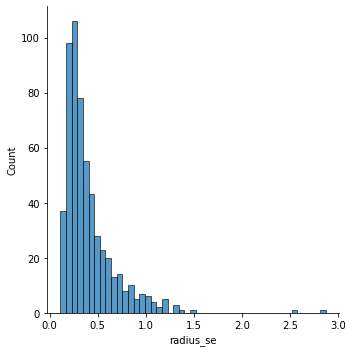

In [ ]:
sns.displot(data=data,x='radius_se')

The distribution is right skewed.

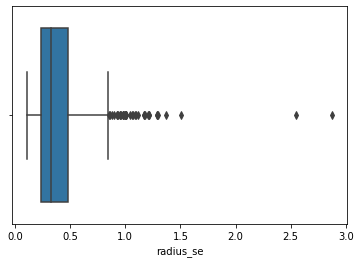

In [ ]:
sns.boxplot(data=data,x='radius_se')

There are considerable outliers.

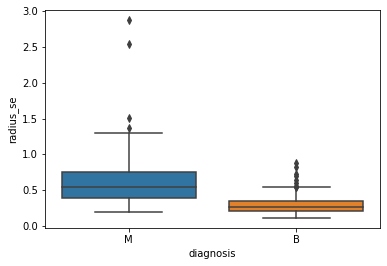

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='radius_se')

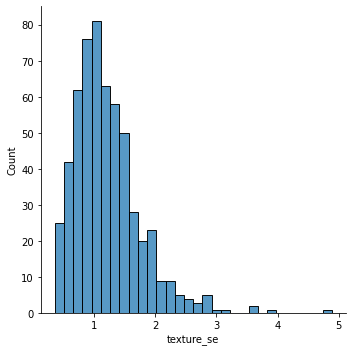

In [ ]:
sns.displot(data=data,x='texture_se')

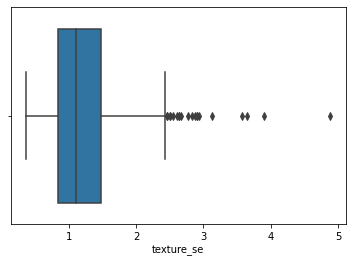

In [ ]:
sns.boxplot(data=data,x='texture_se')

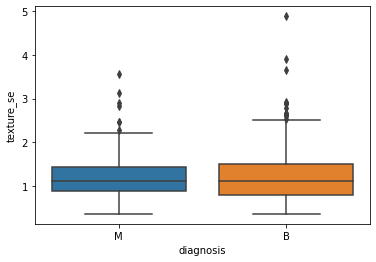

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='texture_se')

This column seems to have no effect on the type as their ranges are almost equal.

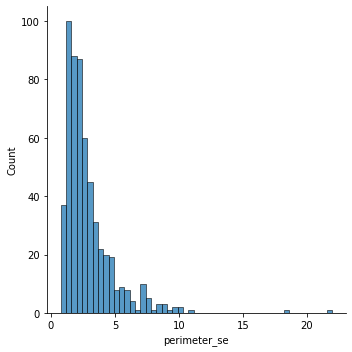

In [ ]:
sns.displot(data=data,x='perimeter_se')

The distribution is right skewed

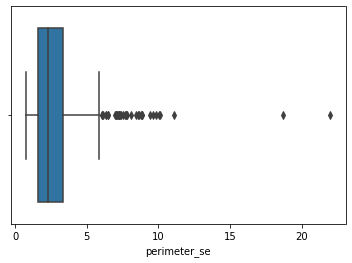

In [ ]:
sns.boxplot(data=data,x='perimeter_se')

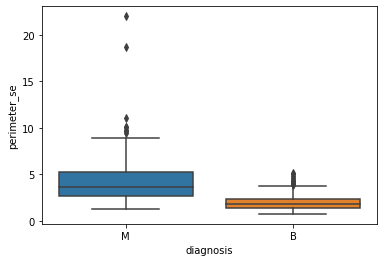

In [ ]:
sns.boxplot(data=data,x='diagnosis',y='perimeter_se')

In [ ]:
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [ ]:
c=data.corr()

In [ ]:
ct=c.diagnosis
ct.sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

Let us take the first 13 columns that has higher correlation towards our target variable(corr value>=0.6)

In [ ]:
data1=data[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst']]

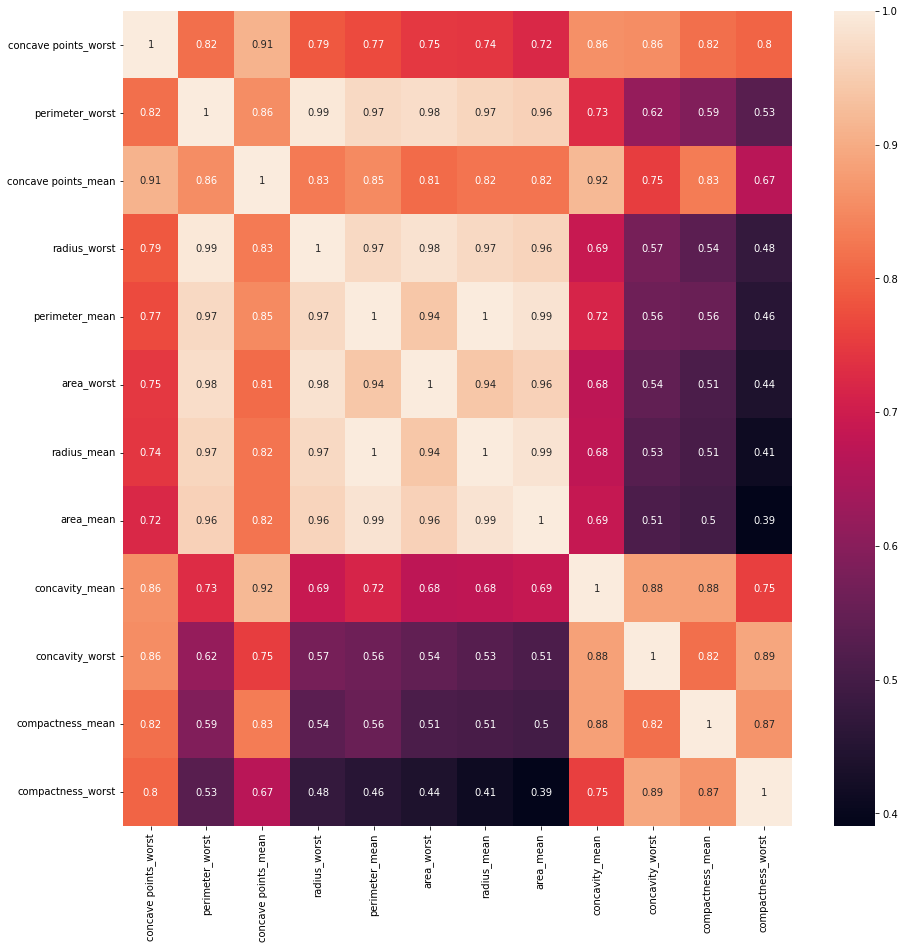

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True)

Many columns seems to have correlation to each other which means there is presence of multicolinearity among the independent variables. As we are performing regression analysis, it becomes very imporrtant that the independent variables must not be correlated among themselves.

In [ ]:
d=pd.DataFrame()

In [ ]:
d['feature']=data1.columns
d["VIF"] = [variance_inflation_factor(data1.values, i)for i in range(len(data1.columns))]


In [ ]:
d

,feature,VIF
0,concave points_worst,69.805324
1,perimeter_worst,2420.786022
2,concave points_mean,89.639785
3,radius_worst,4737.591437
4,perimeter_mean,40614.870104
5,area_worst,560.715842
6,radius_mean,37559.246934
7,area_mean,662.430821
8,concavity_mean,81.090705
9,concavity_worst,65.812998


It can be seen that our independent varibles are highly correlated among each other.

In [ ]:
w=ct.sort_values(ascending=False)
u=w.loc[lambda x:x<1]
u=u.head(12)

In [ ]:
f=pd.DataFrame()
f['Cor_with_target']=u
f['Vif']=[variance_inflation_factor(data1.values, i)for i in range(len(data1.columns))]

In [ ]:
f

,Cor_with_target,Vif
concave points_worst,0.793566,69.805324
perimeter_worst,0.782914,2420.786022
concave points_mean,0.776614,89.639785
radius_worst,0.776454,4737.591437
perimeter_mean,0.742636,40614.870104
area_worst,0.733825,560.715842
radius_mean,0.730029,37559.246934
area_mean,0.708984,662.430821
concavity_mean,0.696360,81.090705
concavity_worst,0.659610,65.812998


From the above dataframe we can see that the attributes that has greater influence on the target variable are corrleated among themselves. It is difficult to remove these variables. Hence we can go for PCA technique.

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables.


It is important to scale the features before using PCA.

In [ ]:
scale=StandardScaler()

In [ ]:
x=data1
y=data[['diagnosis']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
x_train.shape

(398, 12)

In [ ]:
pca=PCA()

In [ ]:
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [ ]:
x_train.shape

(398, 12)

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=lg.predict(x_test)

In [ ]:
accuracy_lg=accuracy_score(y_test,y_pred)

In [ ]:
accuracy_lg

0.9532163742690059

In [ ]:
svc=svm.SVC(kernel='linear',C=1)

In [ ]:
svc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [ ]:
ypred=svc.predict(x_test)

In [ ]:
accuracy_svm=accuracy_score(y_test,ypred)

In [ ]:
accuracy_svm

0.9766081871345029